In [1]:
#importation of libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_df = pd.read_csv("/Users/kolawolegeorge/data analysis/covid.csv")

In [3]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# get information about the database
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
# get the basic statical analysis
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [6]:
vaccine_df = pd.read_csv("/Users/kolawolegeorge/data analysis/vaccine.csv")

In [7]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [8]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [9]:
# removing variables that are not needed for the analysis
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True, axis=1)

In [10]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [11]:
# convert date from object to datatime
covid_df.Date = pd.to_datetime(covid_df.Date, format='%Y-%m-%d')

In [12]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [13]:
# creating a new column caled active cases
covid_df["Active Case"] = covid_df.Confirmed - (covid_df.Cured + covid_df.Deaths)

In [14]:
covid_df.tail(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Case
18100,2021-08-11,Puducherry,119115,1800,121766,851
18101,2021-08-11,Punjab,582791,16322,599573,460
18102,2021-08-11,Rajasthan,944700,8954,953851,197
18103,2021-08-11,Sikkim,25095,356,28018,2567
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [15]:
# to calulate the cured, death etc per state
state_df = pd.pivot_table(covid_df, values=["Confirmed", "Cured", "Deaths"], index="State/UnionTerritory", aggfunc=sum)

In [16]:
state_df

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,1938498,1848286,27136
Andhra Pradesh,392432753,370426530,2939367
Arunachal Pradesh,7176907,6588149,26799
Assam,99837011,92678680,638323
Bihar,132231166,125122902,1093466
Bihar****,1430909,1402468,18881
Cases being reassigned to states,345565,0,0
Chandigarh,10858627,10117035,147694
Chhattisgarh,163776262,151609364,2063920


In [17]:
# Recovery rate
state_df["Recovery Rate"] = state_df.Cured * 100 / state_df.Confirmed

In [18]:
state_df.head(10)

,Confirmed,Cured,Deaths,Recovery Rate
State/UnionTerritory,,,,
Andaman and Nicobar Islands,1938498,1848286,27136,95.346294
Andhra Pradesh,392432753,370426530,2939367,94.392358
Arunachal Pradesh,7176907,6588149,26799,91.796494
Assam,99837011,92678680,638323,92.829983
Bihar,132231166,125122902,1093466,94.624366
Bihar****,1430909,1402468,18881,98.012382
Cases being reassigned to states,345565,0,0,0.000000
Chandigarh,10858627,10117035,147694,93.170481
Chhattisgarh,163776262,151609364,2063920,92.571025


In [19]:
# Death rate
state_df["Death Rate"] = state_df.Deaths * 100 / state_df.Confirmed

In [20]:
state_df.head(10)

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,1938498,1848286,27136,95.346294,1.399847
Andhra Pradesh,392432753,370426530,2939367,94.392358,0.749012
Arunachal Pradesh,7176907,6588149,26799,91.796494,0.373406
Assam,99837011,92678680,638323,92.829983,0.639365
Bihar,132231166,125122902,1093466,94.624366,0.826935
Bihar****,1430909,1402468,18881,98.012382,1.319511
Cases being reassigned to states,345565,0,0,0.000000,0.000000
Chandigarh,10858627,10117035,147694,93.170481,1.360154
Chhattisgarh,163776262,151609364,2063920,92.571025,1.260207


In [21]:
# sorting a table base on the value
state_df = state_df.sort_values(by="Confirmed", ascending=False)

In [22]:
state_df.head(100)

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,1121491467,1018765039,23737432,90.840195,2.116595
Karnataka,485970693,441844360,6053762,90.919960,1.245705
Kerala,458906023,420174235,1888177,91.559974,0.411452
Tamil Nadu,431928644,404095807,5916658,93.556149,1.369823
Andhra Pradesh,392432753,370426530,2939367,94.392358,0.749012
Uttar Pradesh,312625843,291479351,4143450,93.235846,1.325370
Delhi,287227765,273419887,4943294,95.192708,1.721036
West Bengal,263107876,247515102,3846989,94.073619,1.462134
Chhattisgarh,163776262,151609364,2063920,92.571025,1.260207


In [23]:
state_df.style.background_gradient(cmap="Wistia")

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,1121491467,1018765039,23737432,90.840195,2.116595
Karnataka,485970693,441844360,6053762,90.919960,1.245705
Kerala,458906023,420174235,1888177,91.559974,0.411452
Tamil Nadu,431928644,404095807,5916658,93.556149,1.369823
Andhra Pradesh,392432753,370426530,2939367,94.392358,0.749012
Uttar Pradesh,312625843,291479351,4143450,93.235846,1.325370
Delhi,287227765,273419887,4943294,95.192708,1.721036
West Bengal,263107876,247515102,3846989,94.073619,1.462134
Chhattisgarh,163776262,151609364,2063920,92.571025,1.260207


In [24]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Case
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [27]:
# top to active case by state
Top_10_active_case = covid_df.groupby(by=['State/UnionTerritory']).max()[['Active Case', 'Date']]

In [32]:
Top_10_active_case.sort_values(by="Active Case", ascending=False).reset_index()

,State/UnionTerritory,Active Case,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


In [33]:
#VISLIZATION.
fig = plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 state with the most active case')

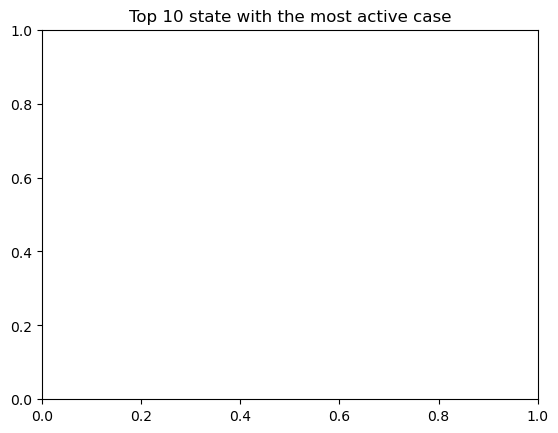

In [34]:
plt.title("Top 10 state with the most active case")